동기화 시작 부분:  391
혼돈신호 가공중:  4
중복제거완료:  4
순서값 넣기 완료:  4
이미지 불러옴:  4
영역나누기 완료!
혼돈신호 가져옴:  4


<ipython-input-17-d09e03813527>:141: RuntimeWarning: overflow encountered in ubyte_scalars
  dic[abs(img1[j, i]-img2[j, i])] += 1


동기화 시작 부분:  391
혼돈신호 가공중:  8
중복제거완료:  8
순서값 넣기 완료:  8
이미지 불러옴:  8
영역나누기 완료!
혼돈신호 가져옴:  8
동기화 시작 부분:  391
혼돈신호 가공중:  10
중복제거완료:  10
순서값 넣기 완료:  10
이미지 불러옴:  10
영역나누기 완료!
혼돈신호 가져옴:  10
동기화 시작 부분:  391
혼돈신호 가공중:  12
중복제거완료:  12
순서값 넣기 완료:  12
이미지 불러옴:  12
영역나누기 완료!
혼돈신호 가져옴:  12
동기화 시작 부분:  391
혼돈신호 가공중:  15
중복제거완료:  15
순서값 넣기 완료:  15
이미지 불러옴:  15
영역나누기 완료!
혼돈신호 가져옴:  15
동기화 시작 부분:  391
혼돈신호 가공중:  16
중복제거완료:  16
순서값 넣기 완료:  16
이미지 불러옴:  16
영역나누기 완료!
혼돈신호 가져옴:  16
동기화 시작 부분:  391
혼돈신호 가공중:  18
중복제거완료:  18
순서값 넣기 완료:  18
이미지 불러옴:  18
영역나누기 완료!
혼돈신호 가져옴:  18
동기화 시작 부분:  391
혼돈신호 가공중:  20
중복제거완료:  20
순서값 넣기 완료:  20
이미지 불러옴:  20
영역나누기 완료!
혼돈신호 가져옴:  20
동기화 시작 부분:  391
혼돈신호 가공중:  24
중복제거완료:  24
순서값 넣기 완료:  24
이미지 불러옴:  24
영역나누기 완료!
혼돈신호 가져옴:  24
동기화 시작 부분:  391
혼돈신호 가공중:  30
중복제거완료:  30
순서값 넣기 완료:  30
이미지 불러옴:  30
영역나누기 완료!
혼돈신호 가져옴:  30


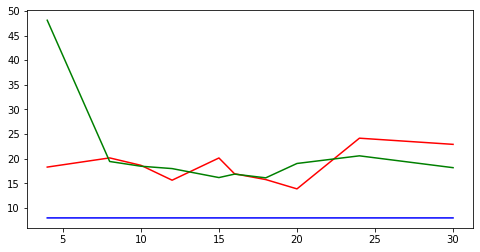

In [17]:
#모듈 임포트================================
import math
import time
import cv2
import numpy as np
import csv
import matplotlib.pyplot as plt
def main(size):
    st = time.time()
    #잡음신호 가져오기
    def csv2list(s):
        file = open(s, 'r')
        csvfile = csv.reader(file)
        lists = []
        for item in csvfile:
            lists.append(item)
        return lists[0]
    
    #신호 발생기
    length = 720 * 720 + 1000
    caos_num = 3.98
    ratio = 0.3
    x1 = 0.0437853
    x2 = 0.7324354
    
    
    listr1 = [] #혼돈계 1
    listr2 = [] #혼돈계 2
    rn = csv2list('noise.txt')
    
    for i in rn:
        k = float(i) #0~1사이의 어떤 신호
        x1 = caos_num * (ratio * k + x1 - x1 * ratio) * (1 - (ratio * k + x1 - x1 * ratio))
        x2 = caos_num * (ratio * k + x2 - x2 * ratio) * (1 - (ratio * k + x2 - x2 * ratio))
        listr1.append(x1)
        listr2.append(x2)
    
    #x1-x2
    result = []
    for i in range(length):
        result.append(listr1[i]-listr2[i])
    
    a = 0  
    #동기화 시작값 탐색  
    for i in range(length):
        if result[i] == 0:
            print("동기화 시작 부분: ", i)
            start = i
            a = 1
            break
    
    #동기화가 되지 않을때
    if a != 1:
        print("동기화 부분 없음")
        
    print("혼돈신호 가공중: ", size)
    #혼돈신호 가공(배치를 위한)
    NoJungBok = [] #가공된 신호
    for i in listr1[start:int(start+720/size * 720/size + 500)]: #500은 중복될 것으로 예상한 개수
        if i not in NoJungBok:
            NoJungBok.append(i)
    print("중복제거완료: ",size)
    NoJungBok = NoJungBok[:int(720/size*720/size)] #개수에 맞게 슬라이싱
    
    sortedNJB = sorted(NoJungBok)
    for i in NoJungBok: #순서 찾기
        NoJungBok[NoJungBok.index(i)] = sortedNJB.index(i) #소수값 대신 순서값 넣어주기
    print("순서값 넣기 완료: ",size)
    
    
    
    #이미지 불러오기
    img = cv2.imread(r'./image/jennie.png')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    print("이미지 불러옴: ", size)
    
    #cv2.imshow('h', img[0:10, 0:10])
    #암호화될 이미지를 넣을 이미지 만들기
    enc = np.zeros((720,720), dtype=np.uint8)
    
    #각 영역에 숫자 부여하기
    area = {}
    cnt = 0
    for i in range(0,720,size):
        for j in range(0, 720, size):
            area[NoJungBok[cnt]]=img[j:j+size, i:i+size]
            cnt += 1    
    print("영역나누기 완료!")
    
    #cv2.imshow('h', area[NoJungBok[0]])
    #재배치
    cnt =0
    for i in range(0,720,size):
        for j in range(0, 720, size):
            enc[j:j+size, i:i+size] = area[cnt]
            cnt += 1

    #혼돈신호 가져오기
    chaos = listr1[start+1:start+720*720+1]
    
    print("혼돈신호 가져옴: ",size)
    
    #혼돈신호를 8비트로 변환하기
    def chant(num):
        for i in range(256):
            if num >= i / 250 and num < (i+1) / 250:
                return i
    
    #암호화 전의 이미지 출력
    #cv2.imshow('before', enc)
    
    #이미지 한줄로 만들기
    listimg = []
    for j in range(720):
        for i in range(720):
            listimg.append(enc[j,i])
    
    #XOR로 암호화 하기
    for i in range(720*720):
            listimg[i] = (listimg[i] ^ chant(chaos[i]))
    
    #이미지리스트 배열로 만들기
    for i in range(720):
        enc[i] = listimg[i*720:i*720+720]
    ft = time.time() 
    
    #==================평가===========
    img1 = cv2.imread(r'.\image\jennie.png')
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img2 = enc
    
    #빈도 딕셔너리 초기화
    dic = {}
    for i in range(256):
        dic[i] = 0
    
    #값 카운트
    for i in range(720):
        for j in range(720):
            dic[abs(img1[j, i]-img2[j, i])] += 1
    
    
    #M_ideal값
    M = 720 * 720 / 256
    
    
    #척도 측정
    result = 0
    for i in range(256):
        result += abs(dic[i]-M)
    
    #============엔트로피 식 코드===========   
    #딕셔너리에 그레이 스케일 값 저장하기
    img = enc
    dic = {}
    for i in range(256):
        dic[i] = 0
        
    for i in range(720):
        for j in range(720):
            dic[img[j, i]]+=1 
            
    #그레이 스케일 값의 확률 함수 만들기        
    def p(n) :
        return dic[n]/(720**2)
    
    #엔트로피 식 계산
    H = 0
    for i in range (256) :
        if p(i) != 0 :
            H += p(i)*math.log2(p(i))
    
        
    return [((result/(720*720))**(-1)), (ft-st), -H]


Value = []
Time = []
entro = []
sizelist = [4,8,10,12,15,16,18,20,24,30]
for i in sizelist:
    result = main(i)
    Value.append(result[0])
    Time.append(result[1])
    entro.append(result[2])
    
plt.figure(figsize=(8,4))
plt.plot(sizelist,Value,color='red')
plt.plot(sizelist,Time,color='green')
plt.plot(sizelist,entro,color='blue')
plt.show()






#cv2.imshow('after', enc)
#cv2.waitKey(0)
#cv2.destroyAllWindows()


In [12]:
print(entro)

[7.967833648017179, 7.968140606581541, 7.968025243808364, 7.967678791583761, 7.967666929849642, 7.967548074363832, 7.968173433141092, 7.967016608283527]


In [13]:
print(Time)

[1.1521868705749512, 0.20123863220214844, 0.4804229736328125, -0.9583868980407715, -0.9495413303375244, -0.012672901153564453, 0.9936618804931641, 0.0022602081298828125]
